In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.gridspec import GridSpec
import matplotlib.patches as mpatches



In [2]:
#changing the width for a more natural view

pd.set_option('display.width', 900)

In [3]:
red_wine = pd.read_csv("/Users/CAB Projects/1_My Projects/4_BlueBerry Winery/Data Set/winequality-red.csv", sep=";")

In [4]:
#Epic 3 - Data Wrangling

print("\nThe first 10 records in the red wine data set\n", red_wine.head(10))

print("\nThe last 10 records in the red wine data set\n", red_wine.tail(10))


The first 10 records in the red wine data set
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  alcohol  quality
0            7.4              0.70         0.00             1.9      0.076                 11.0                  34.0   0.9978  3.51       0.56      9.4        5
1            7.8              0.88         0.00             2.6      0.098                 25.0                  67.0   0.9968  3.20       0.68      9.8        5
2            7.8              0.76         0.04             2.3      0.092                 15.0                  54.0   0.9970  3.26       0.65      9.8        5
3           11.2              0.28         0.56             1.9      0.075                 17.0                  60.0   0.9980  3.16       0.58      9.8        6
4            7.4              0.70         0.00             1.9      0.076                 11.0                  34.0   0.9978  3.51       0.5

In [5]:
#Epic 3 - Data Wrangling

print("\nThe basic information about the red wine data set using info")
red_wine.info()


The basic information about the red wine data set using info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
#Epic 3 - Data Wrangling

print("\nThe basic information about the red wine data set using shape method")
red_wine.shape


The basic information about the red wine data set using shape method


(1599, 12)

In [7]:
#Epic 3 - Data Wrangling

#Checking for missing values

red_wine.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
#Epic 3 - Data Wrangling

#Checking for missing values

red_wine.notna()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,True,True,True,True,True,True,True,True,True,True,True,True
1595,True,True,True,True,True,True,True,True,True,True,True,True
1596,True,True,True,True,True,True,True,True,True,True,True,True
1597,True,True,True,True,True,True,True,True,True,True,True,True


In [9]:
# following common data science pratice and changing the coloumn nacmes

red_wine.columns = red_wine.columns.str.replace(' ', '_')
red_wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'], dtype='object')

In [10]:
#Epic 3 - Data Wrangling

# We are creating a new column called "quality_label", we define a range and associate that range with a label

red_wine["quality_label"] = red_wine['quality'].apply(lambda value: 'low' if value <= 5 else 'medium' if value <= 7 else 'high')

In [11]:
# here we are transforming these labels into categorical data type (specific to pandas) instead of simple string
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
categories = ['low', 'medium', 'high'])

In [12]:
red_wine["wine_type"]= "red"

red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed_acidity         1599 non-null   float64 
 1   volatile_acidity      1599 non-null   float64 
 2   citric_acid           1599 non-null   float64 
 3   residual_sugar        1599 non-null   float64 
 4   chlorides             1599 non-null   float64 
 5   free_sulfur_dioxide   1599 non-null   float64 
 6   total_sulfur_dioxide  1599 non-null   float64 
 7   density               1599 non-null   float64 
 8   pH                    1599 non-null   float64 
 9   sulphates             1599 non-null   float64 
 10  alcohol               1599 non-null   float64 
 11  quality               1599 non-null   int64   
 12  quality_label         1599 non-null   category
 13  wine_type             1599 non-null   object  
dtypes: category(1), float64(11), int64(1), object(1)
memory 

In [13]:
white_wine = pd.read_csv("/Users/CAB Projects/1_My Projects/4_BlueBerry Winery/Data Set/winequality-white.csv", sep=";")

In [14]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [15]:
# following common data science pratice and changing the coloumn nacmes

white_wine.columns = white_wine.columns.str.replace(' ', '_')
white_wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'], dtype='object')

In [16]:
# checking the white wine data set

white_wine.shape


(4898, 12)

In [17]:
# checking the white wine data set

white_wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [18]:
# checking the white wine data set

white_wine.isnull()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,False,False,False,False,False,False,False,False,False,False,False,False
4894,False,False,False,False,False,False,False,False,False,False,False,False
4895,False,False,False,False,False,False,False,False,False,False,False,False
4896,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
#Epic 3 - Data Wrangling

print("\nThe first 10 records in the white wine data set\n", white_wine.head(10))

print("\nThe last 10 records in the white wine data set\n", white_wine.tail(10))


The first 10 records in the white wine data set
    fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  alcohol  quality
0            7.0              0.27         0.36            20.7      0.045                 45.0                 170.0   1.0010  3.00       0.45      8.8        6
1            6.3              0.30         0.34             1.6      0.049                 14.0                 132.0   0.9940  3.30       0.49      9.5        6
2            8.1              0.28         0.40             6.9      0.050                 30.0                  97.0   0.9951  3.26       0.44     10.1        6
3            7.2              0.23         0.32             8.5      0.058                 47.0                 186.0   0.9956  3.19       0.40      9.9        6
4            7.2              0.23         0.32             8.5      0.058                 47.0                 186.0   0.9956  3.19       0

In [20]:
# we are creating a new column called "quality_label", we define a range and associate that range with a label

white_wine["quality_label"] = white_wine["quality"].apply(lambda value: "low" if value <= 5 else "medium" if value <= 7 else "high")


# here we are transforming these labels into categorical data type (specific to pandas) instead of simple string
white_wine["quality_label"] = pd.Categorical(white_wine["quality_label"], 
categories = ["low", "medium", "high"])

# labelling white wine dataset with its wine type
white_wine["wine_type"] = "white"

print("\n", white_wine.head(10))
print("\n", white_wine.tail(10))


    fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  alcohol  quality quality_label wine_type
0            7.0              0.27         0.36            20.7      0.045                 45.0                 170.0   1.0010  3.00       0.45      8.8        6        medium     white
1            6.3              0.30         0.34             1.6      0.049                 14.0                 132.0   0.9940  3.30       0.49      9.5        6        medium     white
2            8.1              0.28         0.40             6.9      0.050                 30.0                  97.0   0.9951  3.26       0.44     10.1        6        medium     white
3            7.2              0.23         0.32             8.5      0.058                 47.0                 186.0   0.9956  3.19       0.40      9.9        6        medium     white
4            7.2              0.23         0.32             8.5     

In [21]:
# Then combining the two datasets into one: wines.

wines = pd.concat([red_wine, white_wine])
wines.info()
wines.head(10), wines.tail(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed_acidity         6497 non-null   float64 
 1   volatile_acidity      6497 non-null   float64 
 2   citric_acid           6497 non-null   float64 
 3   residual_sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free_sulfur_dioxide   6497 non-null   float64 
 6   total_sulfur_dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   int64   
 12  quality_label         6497 non-null   category
 13  wine_type             6497 non-null   object  
dtypes: category(1), float64(11), int64(1), object(1)
memory 

(   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  alcohol  quality quality_label wine_type
 0            7.4              0.70         0.00             1.9      0.076                 11.0                  34.0   0.9978  3.51       0.56      9.4        5           low       red
 1            7.8              0.88         0.00             2.6      0.098                 25.0                  67.0   0.9968  3.20       0.68      9.8        5           low       red
 2            7.8              0.76         0.04             2.3      0.092                 15.0                  54.0   0.9970  3.26       0.65      9.8        5           low       red
 3           11.2              0.28         0.56             1.9      0.075                 17.0                  60.0   0.9980  3.16       0.58      9.8        6        medium       red
 4            7.4              0.70         0.00             1.9 

In [22]:
# re-shuffle records just to randomize data points
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)
wines.head(10), wines.tail(10)

(   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  alcohol  quality quality_label wine_type
 0            7.0              0.17         0.74            12.8      0.045                 24.0                 126.0  0.99420  3.26       0.38     12.2        8          high     white
 1            7.7              0.64         0.21             2.2      0.077                 32.0                 133.0  0.99560  3.27       0.45      9.9        5           low       red
 2            6.8              0.39         0.34             7.4      0.020                 38.0                 133.0  0.99212  3.18       0.44     12.0        7        medium     white
 3            6.3              0.28         0.47            11.2      0.040                 61.0                 183.0  0.99592  3.12       0.51      9.5        6        medium     white
 4            7.4              0.35         0.20            13.9 

In [23]:
# Epic 3: Exploratory Analysis -  Creating a table to compare

pd.concat([red_wine[["residual_sugar", "total_sulfur_dioxide", "sulphates", "alcohol", "volatile_acidity", "quality"]].describe(), 
white_wine[["residual_sugar", "total_sulfur_dioxide", "sulphates", "alcohol", "volatile_acidity", "quality"]].describe()], keys= ["red wine statistics", "white wine statistics"], axis=1)

red wine statistics                                                                              white wine statistics                                                                             
           residual_sugar total_sulfur_dioxide    sulphates      alcohol volatile_acidity      quality        residual_sugar total_sulfur_dioxide    sulphates      alcohol volatile_acidity      quality
count         1599.000000          1599.000000  1599.000000  1599.000000      1599.000000  1599.000000           4898.000000          4898.000000  4898.000000  4898.000000      4898.000000  4898.000000
mean             2.538806            46.467792     0.658149    10.422983         0.527821     5.636023              6.391415           138.360657     0.489847    10.514267         0.278241     5.877909
std              1.409928            32.895324     0.169507     1.065668         0.179060     0.807569              5.072058            42.498065     0.114126     1.230621         0.100795     0.885639
min              0.900000             6.000000     0.330000     8.400000         0.120000     3.000000              0.600000             9.000000     0.220000     8.000000         0.080000     3.000000
25%              1.900000            22.000000     0.550000     9.500000         0.390000     5.000000              1.700000           108.000000     0.410000     9.500000         0.210000     5.000000
50%              2.200000            38.000000     0.620000    10.200000         0.520000     6.000000              5.200000           134.000000     0.470000    10.400000         0.260000     6.000000
75%              2.600000            62.000000     0.730000    11.100000         0.640000     6.000000              9.900000           167.000000     0.550000    11.400000         0.320000     6.000000
max             15.500000           289.000000     2.000000    14.900000         1.580000     8.000000             65.800000           440.000000     1.080000    14.200000         1.100000     9.000000

In [24]:
# Observations on the dataset
# white wine has more residual sugar than red wine on average
# We have more data on white wine compared to red
# Sulfur dioxide is much higher in white compared to red wines. There is a high std. what does that mean?
# Volatile acidity is lower in white wine on average
# The alcohol content is the same on average
# On average, sulfates and volatile acidity seem to be higher in red wine as compared to white wine.
# high qualitiy white wines have low sugar levels and total SO2 --> high quality between sugar levels and quality
# the company produces more quality white wines as compared to reds (3,7%, and 62%)


In [25]:
# Here we are practicing slicing

white_wine.iloc[:,[0,2]]

,fixed_acidity,citric_acid
0,7.0,0.36
1,6.3,0.34
2,8.1,0.40
3,7.2,0.32
4,7.2,0.32
...,...,...
4893,6.2,0.29
4894,6.6,0.36
4895,6.5,0.19
4896,5.5,0.30


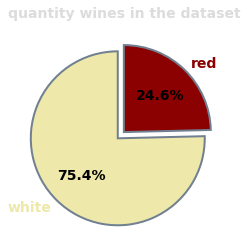

In [26]:
# 1st plot - showing the quantity of red wines compared to the quantity of white wines

# first, get the count of red and white wines from the dataframe, using labels from dataframe

colors1 = ["PaleGoldenRod", "darkred"]

patches, texts, pcts = plt.pie(
        wines["wine_type"].value_counts(), #data
        autopct='%1.1f%%', 
        labels= wines["wine_type"].unique(),
        startangle= 90, 
        colors= colors1,
        wedgeprops= {"linewidth": 2, "edgecolor": "slategrey"},
        textprops= {"size": 14, "fontweight":'bold'},
        explode= (0.1, 0)
        )

#playing aroung with the styling
# For each wedge, set the corresponding text label color to the wedge's face color

for i, patch in enumerate (patches):
        texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color = "black")
plt.title("quantity wines in the dataset", {"size": 14, "fontweight":'bold', "color": "gainsboro"})
plt.show()


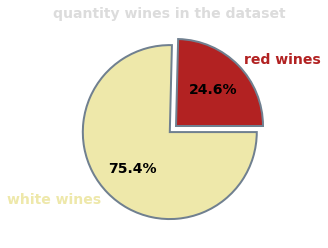

In [27]:
# 1st plot - showing the quantity of red wines compared to the quantity of white wines
# Now we use the subplot function

# first, get the count of red and white wines
quantity_of_wines = wines.groupby(["wine_type"])["wine_type"].count()

# number two - give them labels
labels1 = "red wines", "white wines"
colors2 = ["FireBrick", "PaleGoldenRod"]

# number three - plot and style
fig, ax = plt.subplots()
patches, texts, pcts = ax.pie(quantity_of_wines, 
                                labels= labels1,
                                autopct='%1.1f%%',
                                colors= colors2,
                                wedgeprops= {"linewidth": 2, "edgecolor": "slategrey"},
                                textprops= {"size": 14, "fontweight":"bold"},
                                explode= (0.1, 0)
                             )


for i, patch in enumerate (patches):
        texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color = "black")
plt.title("quantity wines in the dataset", {"size": 14, "fontweight":'bold', "color": "gainsboro"})
plt.show()


In [28]:

# Plot to show the distribution of qualities among red and white wines

# creating two data frames

Quality_Whites = white_wine[["quality_label"]].value_counts().rename_axis("quality_label").reset_index(name="counts").sort_values(by=["quality_label"])
print("The distribution of qualities among the whites are \n",Quality_Whites)

print("\n")

Quality_Reds = red_wine[["quality_label"]].value_counts().rename_axis("quality_label").reset_index(name="counts").sort_values(by=["quality_label"])
print("The distribution of qualities among the reds are \n", Quality_Reds)

The distribution of qualities among the whites are 
   quality_label  counts
1           low    1640
0        medium    3078
2          high     180


The distribution of qualities among the reds are 
   quality_label  counts
1           low     744
0        medium     837
2          high      18


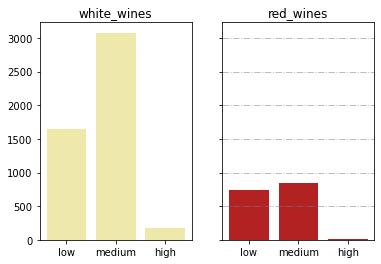

In [29]:
# Now we plot with information from the above cell

fig1,(ax1, ax2) = plt.subplots(1,2, sharey=True)

ax1.bar(Quality_Whites["quality_label"], Quality_Whites["counts"], color= "PaleGoldenRod")
ax2.bar(Quality_Reds["quality_label"], Quality_Reds["counts"],color= "FireBrick")

ax1.set_title("white_wines")
ax2.set_title("red_wines")

plt.grid(color='slategrey', linestyle='-.', linewidth=1, axis='y', alpha=0.5)
plt.show()

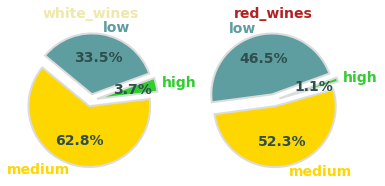

In [30]:
# Distribution of qualities as a pie chart - more useful

fig2, ax = plt.subplots(1,2)
colors3 = ("CadetBlue", "Gold", "LimeGreen")

#plotting white wines as a pie chart
patches, texts, pcts = ax[0].pie(Quality_Whites["counts"], labels= Quality_Whites["quality_label"], #this is the data. below is styling
                        autopct='%1.1f%%', 
                        colors= colors3,
                        startangle= 20,
                        explode= (0.1, 0.1, 0.1),
                        wedgeprops= {"linewidth": 2, "edgecolor": "gainsboro"},
                        textprops= {"size": 14, "fontweight":"bold", "color": "DarkSlateGray"},
                        )

patches2, texts2, pcts2 = ax[1].pie(Quality_Reds["counts"], labels= Quality_Reds["quality_label"], #this is the data. below is styling
                        autopct='%1.1f%%', 
                        colors= colors3,
                        startangle= 20,
                        explode= (0.1, 0.1, 0.1),
                        wedgeprops= {"linewidth": 2, "edgecolor": "gainsboro"},
                        textprops= {"size": 14, "fontweight":"bold", "color": "DarkSlateGray"}
                        )

for i, patch in enumerate (patches):
        texts[i].set_color(patch.get_facecolor())

for i, patch in enumerate (patches2):
        texts2[i].set_color(patch.get_facecolor())



ax[0].set_title("white_wines",{"size": 14, "fontweight":'bold', "color": "PaleGoldenRod"})
ax[1].set_title("red_wines", {"size": 14, "fontweight":'bold', "color": "FireBrick"})
plt.show()

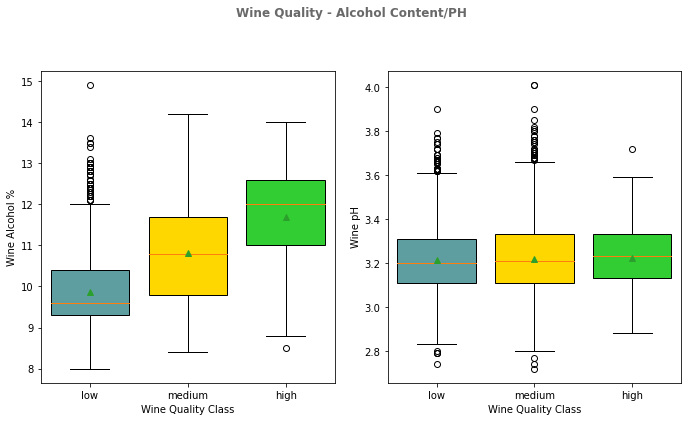

In [31]:
# First we generate data

# here we generate data for comparing the wine quailities and the *alcohol* content
alc_vs_quality_low = wines[wines["quality_label"] == "low"]["alcohol"]
alc_vs_quality_mid = wines[wines["quality_label"] == "medium"]["alcohol"]
alc_vs_quality_high = wines[wines["quality_label"] == "high"]["alcohol"]

alc_vs_quality = (alc_vs_quality_low , alc_vs_quality_mid, alc_vs_quality_high)

# here we generate data for comparing the wine quailities and the *ph* value

ph_vs_quality_low = wines[wines["quality_label"] == "low"]["pH"]
ph_vs_quality_mid = wines[wines["quality_label"] == "medium"]["pH"]
ph_vs_quality_high = wines[wines["quality_label"] == "high"]["pH"]

ph_vs_quality = (ph_vs_quality_low, ph_vs_quality_mid, ph_vs_quality_high)

# and create labels for the plot
labels = ['low', 'medium','high']

# Now we call the subplot function
fig3, (ax1, ax2) = plt.subplots(nrows= 1, ncols= 2, figsize= (10,6))

# now we plot
bplot1 = ax1.boxplot(alc_vs_quality, widths= 0.8, patch_artist= True, labels= labels, showmeans= True)
bplot2 = ax2.boxplot(ph_vs_quality, widths= 0.8, patch_artist= True, labels= labels, showmeans= True)

# now we make everything look nicer

#adding a super title
plt.suptitle("Wine Quality - Alcohol Content/PH", weight= "demibold", color= "dimgrey")

#let's separate the figures a bit
fig3.tight_layout(pad=3)

#adding labels for plot 1
ax1.set_xlabel("Wine Quality Class")
ax1.set_ylabel("Wine Alcohol %")

#adding labels for plot 2
ax2.set_xlabel("Wine Quality Class")
ax2.set_ylabel("Wine pH")

# filling colors
colors = ["CadetBlue", "Gold", "LimeGreen"]
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot["boxes"], colors): patch.set_facecolor(color)

plt.show()


In [32]:
# Here we are practicing slicing and comparing features

quality_features = wines[wines.columns[0:13]].groupby(["quality_label"]).quantile()
print("The quality features of wines in general\n", quality_features)

quality_features_white = white_wine[white_wine.columns[0:13]].groupby(["quality_label"]).quantile()
print("\nThe quality features of white wines\n", quality_features_white)

quality_features_red = red_wine[red_wine.columns[0:13]].groupby(["quality_label"]).quantile()
print("\nThe quality features of red wines\n", quality_features_red)

The quality features of wines in general
                fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  alcohol  quality
quality_label                                                                                                                                                                
low                      7.1            0.3375        0.295            2.90     0.0520                 26.0                 124.0  0.99600  3.20       0.50      9.6      5.0
medium                   6.9            0.2700        0.310            3.00     0.0450                 29.0                 116.0  0.99400  3.21       0.51     10.8      6.0
high                     6.8            0.2750        0.320            4.05     0.0365                 34.0                 118.5  0.99178  3.23       0.48     12.0      8.0

The quality features of white wines
                fixed_acidity  volatile_acidity  ci

In [33]:
# OBSERVATIONS
# Low quality white wines have a higher total sulfur on average
# Same for red wines. this could mean that the preservatives taste might be coming through
# Free Sulphur is significantly lower in high reds
# little differences in acidity levels in white wines - only volatile seems to change. Mistake or same

In [34]:
#lets get all the low quality wines - test slicing and filtering
low_quality = wines[wines["quality_label"] == "low"]["alcohol"]

low_quality

1        9.9
6       10.2
8        9.2
10       9.1
11       9.5
        ... 
6490    11.3
6492     9.2
6494     9.5
6495     9.5
6496     9.5
Name: alcohol, Length: 2384, dtype: float64

In [35]:
# Practising slicing with loc
wines.loc[wines["quality_label"] == "low", ["alcohol"]]

,alcohol
1,9.9
6,10.2
8,9.2
10,9.1
11,9.5
...,...
6490,11.3
6492,9.2
6494,9.5
6495,9.5


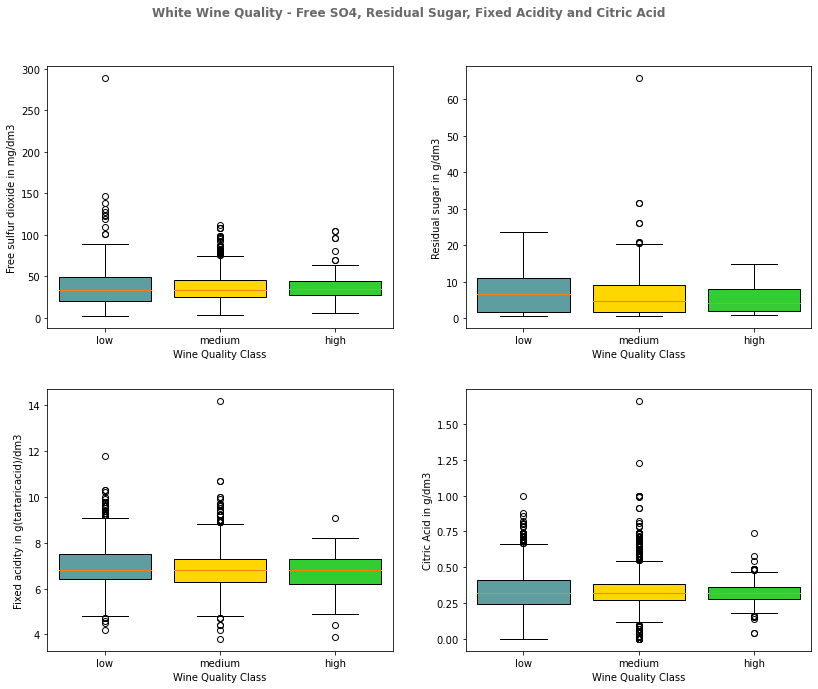

In [36]:
# Now we will create multiple boxplots to compare the different chemical properties of WHITE WINES to quality

# here we generate data for comparing the white wine quailities and the *sulphur* content
Sul_vs_quality_low_wh = white_wine[white_wine["quality_label"] == "low"]["free_sulfur_dioxide"]
Sul_vs_quality_mid_wh = white_wine[white_wine["quality_label"] == "medium"]["free_sulfur_dioxide"]
Sul_vs_quality_high_wh = white_wine[white_wine["quality_label"] == "high"]["free_sulfur_dioxide"]

Sul_vs_quality_wh = (Sul_vs_quality_low_wh , Sul_vs_quality_mid_wh, Sul_vs_quality_high_wh)

# here we generate data for comparing the white wine quailities and the *Residual Sugar* value

Sugar_vs_quality_low_wh = white_wine[white_wine["quality_label"] == "low"]["residual_sugar"]
Sugar_vs_quality_mid_wh = white_wine[white_wine["quality_label"] == "medium"]["residual_sugar"]
Sugar_vs_quality_high_wh = white_wine[white_wine["quality_label"] == "high"]["residual_sugar"]

Sugar_vs_quality_wh = (Sugar_vs_quality_low_wh, Sugar_vs_quality_mid_wh, Sugar_vs_quality_high_wh)

# here we generate data for comparing the white wine quailities and the *fixed acidity* value

Fixed_vs_quality_low_wh = white_wine[white_wine["quality_label"] == "low"]["fixed_acidity"]
Fixed_vs_quality_mid_wh = white_wine[white_wine["quality_label"] == "medium"]["fixed_acidity"]
Fixed_vs_quality_high_wh = white_wine[white_wine["quality_label"] == "high"]["fixed_acidity"]

fixed_vs_quality_wh = (Fixed_vs_quality_low_wh, Fixed_vs_quality_mid_wh, Fixed_vs_quality_high_wh)

# here we generate data for comparing the white wine quailities and the *Citric Acid* value

Citric_vs_quality_low_wh = white_wine[white_wine["quality_label"] == "low"]["citric_acid"]
Citric_vs_quality_mid_wh = white_wine[white_wine["quality_label"] == "medium"]["citric_acid"]
Citric_vs_quality_high_wh = white_wine[white_wine["quality_label"] == "high"]["citric_acid"]

Citric_vs_quality_wh = (Citric_vs_quality_low_wh, Citric_vs_quality_mid_wh, Citric_vs_quality_high_wh)

# and create labels for the plot
labels = ['low', 'medium','high']

# Now we call the subplot function
fig4, ((ax3, ax4), (ax5, ax6)) = plt.subplots(nrows= 2, ncols= 2, figsize= (12,10))

# now we plot 3
bplot3 = ax3.boxplot(Sul_vs_quality_wh, widths= 0.8, patch_artist= True, labels= labels)
ax3.set_xlabel("Wine Quality Class")
ax3.set_ylabel("Free sulfur dioxide in mg/dm3")

# now we plot 4
bplot4 = ax4.boxplot(Sugar_vs_quality_wh, widths= 0.8, patch_artist= True, labels= labels)
ax4.set_xlabel("Wine Quality Class")
ax4.set_ylabel("Residual sugar in g/dm3")

# now we plot 5
bplot5 = ax5.boxplot(fixed_vs_quality_wh, widths= 0.8, patch_artist= True, labels= labels)
ax5.set_xlabel("Wine Quality Class")
ax5.set_ylabel("Fixed acidity in g(tartaricacid)/dm3")

# now we plot 6

bplot6 = ax6.boxplot(Citric_vs_quality_wh, widths= 0.8, patch_artist= True, labels= labels)
ax6.set_xlabel("Wine Quality Class")
ax6.set_ylabel("Citric Acid in g/dm3")

# now we make everything look nicer

#adding a super title
plt.suptitle("White Wine Quality - Free SO4, Residual Sugar, Fixed Acidity and Citric Acid", weight= "demibold", color= "dimgrey")

#let's separate the figures a bit
fig4.tight_layout(pad=3)

# filling colors
colors = ["CadetBlue", "Gold", "LimeGreen"]
for bplot in (bplot3, bplot4, bplot5, bplot6):
    for patch, color in zip(bplot["boxes"], colors): patch.set_facecolor(color)

plt.show()

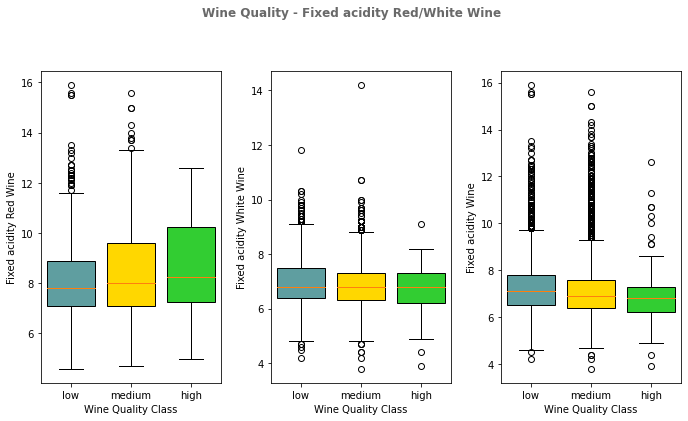

In [76]:
#
# First we generate data

# here we generate data for comparing the red wine qualities and the *fixed acidity* content
red_fix_quality_low = red_wine[red_wine["quality_label"] == "low"]["fixed_acidity"]
red_fix_quality_mid = red_wine[red_wine["quality_label"] == "medium"]["fixed_acidity"]
red_fix_quality_high = red_wine[red_wine["quality_label"] == "high"]["fixed_acidity"]

red_fix_quality = (red_fix_quality_low , red_fix_quality_mid, red_fix_quality_high)

# here we generate data for comparing the white wine qualities and the *fixed acidity* value

white_fix_quality_low = white_wine[white_wine["quality_label"] == "low"]["fixed_acidity"]
white_fix_quality_mid = white_wine[white_wine["quality_label"] == "medium"]["fixed_acidity"]
white_fix_quality_high = white_wine[white_wine["quality_label"] == "high"]["fixed_acidity"]

white_fix_quality = (white_fix_quality_low , white_fix_quality_mid, white_fix_quality_high)

# here we generate data for comparing the wine qualities and the *fixed acidity* value

fix_vs_quality_low = wines[wines["quality_label"] == "low"]["fixed_acidity"]
fix_vs_quality_mid = wines[wines["quality_label"] == "medium"]["fixed_acidity"]
fix_vs_quality_high = wines[wines["quality_label"] == "high"]["fixed_acidity"]

fix_vs_fix_quality = (fix_vs_quality_low , fix_vs_quality_mid, fix_vs_quality_high)

# and create labels for the plot
labels = ['low', 'medium','high']

# Now we call the subplot function
fig4, (ax3, ax4, ax8) = plt.subplots(nrows= 1, ncols= 3, figsize= (10,6))

# now we plot
bplot3 = ax3.boxplot(red_fix_quality, widths= 0.8, patch_artist= True, labels= labels)
bplot4 = ax4.boxplot(white_fix_quality, widths= 0.8, patch_artist= True, labels= labels)
bplot8 = ax8.boxplot(fix_vs_fix_quality, widths= 0.8, patch_artist= True, labels= labels)

#adding title
plt.suptitle("Wine Quality - Fixed acidity Red/White Wine", weight= "demibold", color= "dimgrey")

#let's separate the figures a bit
fig4.tight_layout(pad=3)

#adding labels for plot 1
ax3.set_xlabel("Wine Quality Class")
ax3.set_ylabel("Fixed acidity Red Wine")

#adding labels for plot 2
ax4.set_xlabel("Wine Quality Class")
ax4.set_ylabel("Fixed acidity White Wine")

#adding labels for plot 3
ax8.set_xlabel("Wine Quality Class")
ax8.set_ylabel("Fixed acidity Wine")

# filling colors
colors = ["CadetBlue", "Gold", "LimeGreen"]
for bplot in (bplot3, bplot4, bplot8):
    for patch, color in zip(bplot["boxes"], colors): patch.set_facecolor(color)

plt.show()


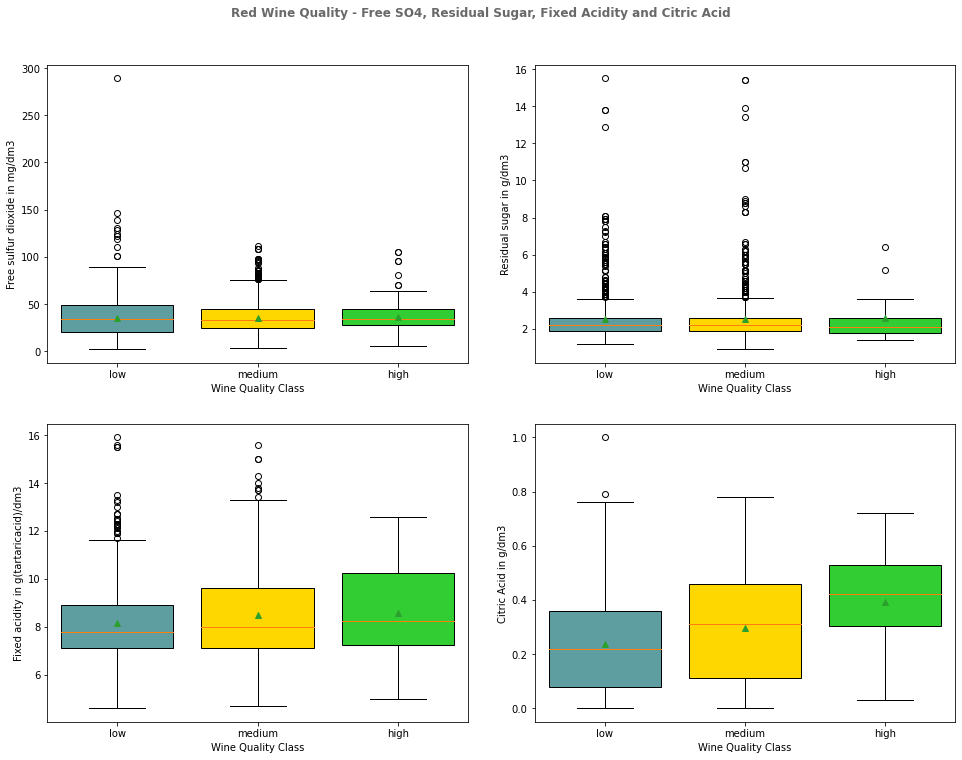

In [73]:
# Now we will create multiple boxplots to compare the different chemical properties of RED WINES to quality

# here we generate data for comparing the white wine quailities and the *sulphur* content
Sul_vs_quality_low_red = red_wine[red_wine["quality_label"] == "low"]["free_sulfur_dioxide"]
Sul_vs_quality_mid_red = red_wine[red_wine["quality_label"] == "medium"]["free_sulfur_dioxide"]
Sul_vs_quality_high_red = red_wine[red_wine["quality_label"] == "high"]["free_sulfur_dioxide"]

Sul_vs_quality_red = (Sul_vs_quality_low_red , Sul_vs_quality_mid_red, Sul_vs_quality_high_red)

# here we generate data for comparing the white wine quailities and the *Residual Sugar* value

Sugar_vs_quality_low_red = red_wine[red_wine["quality_label"] == "low"]["residual_sugar"]
Sugar_vs_quality_mid_red = red_wine[red_wine["quality_label"] == "medium"]["residual_sugar"]
Sugar_vs_quality_high_red = red_wine[red_wine["quality_label"] == "high"]["residual_sugar"]

Sugar_vs_quality_wh = (Sugar_vs_quality_low_red, Sugar_vs_quality_mid_red, Sugar_vs_quality_high_red)

# here we generate data for comparing the white wine quailities and the *fixed acidity* value

Fixed_vs_quality_low_red = red_wine[red_wine["quality_label"] == "low"]["fixed_acidity"]
Fixed_vs_quality_mid_red = red_wine[red_wine["quality_label"] == "medium"]["fixed_acidity"]
Fixed_vs_quality_high_red = red_wine[red_wine["quality_label"] == "high"]["fixed_acidity"]

fixed_vs_quality_wh = (Fixed_vs_quality_low_red, Fixed_vs_quality_mid_red, Fixed_vs_quality_high_red)

# here we generate data for comparing the white wine quailities and the *Citric Acid* value

Citric_vs_quality_low_red = red_wine[red_wine["quality_label"] == "low"]["citric_acid"]
Citric_vs_quality_mid_red = red_wine[red_wine["quality_label"] == "medium"]["citric_acid"]
Citric_vs_quality_high_red = red_wine[red_wine["quality_label"] == "high"]["citric_acid"]

Citric_vs_quality_wh = (Citric_vs_quality_low_red, Citric_vs_quality_mid_red, Citric_vs_quality_high_red)

# and create labels for the plot
labels = ['low', 'medium','high']

# Now we call the subplot function
fig5, ((ax3, ax4), (ax5, ax6)) = plt.subplots(nrows= 2, ncols= 2, figsize= (14,11))

# now we plot 3
bplot3 = ax3.boxplot(Sul_vs_quality_wh, widths= 0.8, patch_artist= True, labels= labels, showmeans= True)
ax3.set_xlabel("Wine Quality Class")
ax3.set_ylabel("Free sulfur dioxide in mg/dm3")

# now we plot 4
bplot4 = ax4.boxplot(Sugar_vs_quality_wh, widths= 0.8, patch_artist= True, labels= labels, showmeans= True)
ax4.set_xlabel("Wine Quality Class")
ax4.set_ylabel("Residual sugar in g/dm3")

# now we plot 5
bplot5 = ax5.boxplot(fixed_vs_quality_wh, widths= 0.8, patch_artist= True, labels= labels, showmeans= True)
ax5.set_xlabel("Wine Quality Class")
ax5.set_ylabel("Fixed acidity in g(tartaricacid)/dm3")

# now we plot 6

bplot6 = ax6.boxplot(Citric_vs_quality_wh, widths= 0.8, patch_artist= True, labels= labels, showmeans= True)
ax6.set_xlabel("Wine Quality Class")
ax6.set_ylabel("Citric Acid in g/dm3")

# now we make everything look nicer

#adding a super title
plt.suptitle("Red Wine Quality - Free SO4, Residual Sugar, Fixed Acidity and Citric Acid", weight= "demibold", color= "dimgrey")

#let's separate the figures a bit
fig5.tight_layout(pad=3)

# filling colors
colors = ["CadetBlue", "Gold", "LimeGreen"]
for bplot in (bplot3, bplot4, bplot5, bplot6):
    for patch, color in zip(bplot["boxes"], colors): patch.set_facecolor(color)

plt.show()

In [38]:
# Now the statistics show begins :D

# applying ANOVA to prove if mean alcohol level vary significantly among the low quality, medium quality and high quality wines?

F, p = stats.f_oneway(wines[wines['quality_label'] == 'low']['alcohol'],
wines[wines['quality_label'] == 'medium']['alcohol'],
wines[wines['quality_label'] == 'high']['alcohol'])
print('ANOVA test for mean alcohol levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

#####What is the Ho Hypothesis in this case? 
# Ho = The mean alcohol levels are the same among all the quality levels! ##
# The result tells us that there is a statistically significant difference in alcohol level means because p-value is smaller that =0.05 (hence, rejecting the null hypothesis in favor of the alternative).
# High F Statistic Value means most of the variation comes from between the groups
# Alchohol plays a role in quality in quality because mean varies



ANOVA test for mean alcohol levels across wine samples with different quality ratings
F Statistic: 673.0745347231032 	p-value: 2.2715337450621843e-266


In [39]:
# applying ANOVA to prove if mean pH level vary significantly among the low quality, medium quality and high quality wines?

F, p = stats.f_oneway(wines[wines['quality_label'] == 'low']['pH'],
wines[wines['quality_label'] == 'medium']['pH'],
wines[wines['quality_label'] == 'high']['pH'])
print('ANOVA test for mean ph levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

# Low F Statistic means most of the variation comes from within the groups. In combination with the high p-Value,
# p-value is high, meaning there is statistically no significant difference in mean pH levels between the groups. Cant reject null Hypothesis. Means are equal, there is no difference

# Note to self:
# Crticical Value syntax (1 - p value, (Groups - 1 => dfn: The numerator degrees of freedom), (dfd: The denominator degrees of freedom - groups) (so between groups/ within groups))

ANOVA test for mean ph levels across wine samples with different quality ratings
F Statistic: 1.2363860803545201 	p-value: 0.2905002779768688


In [40]:
# applying ANOVA to prove if mean residual sugar levels vary significantly among the low quality, medium quality and high quality wines?


F, p = stats.f_oneway(wines[wines['quality_label'] == 'low']['residual_sugar'],
wines[wines['quality_label'] == 'medium']['residual_sugar'],
wines[wines['quality_label'] == 'high']['residual_sugar'])
print('ANOVA test for mean residual sugar levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

# p-value is relatively small but close to the threshhold. Hence statistically the means are not equal across the groups. Residual sugar has staitiscal significant impact on wines quality in general.
# But maybe little impact compared to other wines?

ANOVA test for mean residual sugar levels across wine samples with different quality ratings
F Statistic: 3.432938987382213 	p-value: 0.032350509691691995


In [41]:
# applying ANOVA to prove if mean free S04 levels vary significantly among the low quality, medium quality and high quality wines?


F, p = stats.f_oneway(wines[wines['quality_label'] == 'low']['free_sulfur_dioxide'],
wines[wines['quality_label'] == 'medium']['free_sulfur_dioxide'],
wines[wines['quality_label'] == 'high']['free_sulfur_dioxide'])
print('ANOVA test for mean free SO4 across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

# p-value is small and f statistic high, signalling the Ho can be rejected. Hence free So4 has significant impact on wines quality in general.

ANOVA test for mean free SO4 across wine samples with different quality ratings
F Statistic: 10.312540552928878 	p-value: 3.3761187237755544e-05


In [78]:
# applying ANOVA to prove if mean fixed acidity levels vary significantly among the low quality, medium quality and high quality wines?

F, p = stats.f_oneway(wines[wines['quality_label'] == 'low']['fixed_acidity'],
wines[wines['quality_label'] == 'medium']['fixed_acidity'],
wines[wines['quality_label'] == 'high']['fixed_acidity'])
print('ANOVA test for mean fixed_acidity across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p,"\n")

F, p = stats.f_oneway(wines[wines['quality_label'] == 'low']['pH'],
wines[wines['quality_label'] == 'medium']['pH'],
wines[wines['quality_label'] == 'high']['pH'])
print('ANOVA test for mean pH across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

# p-value is small and f statistic high, signalling the Ho can be rejected. Hence fixed acidity has impact on wines quality in general.

ANOVA test for mean fixed_acidity across wine samples with different quality ratings
F Statistic: 20.381638498376496 	p-value: 1.4997963980511249e-09 

ANOVA test for mean pH across wine samples with different quality ratings
F Statistic: 1.2363860803545201 	p-value: 0.2905002779768688


In [43]:
# Now we check for significance depending on the wine type.
# First white wine
# fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  alcohol

F, p = stats.f_oneway(white_wine[white_wine['quality_label'] == 'low']['fixed_acidity'],
wines[wines['quality_label'] == 'medium']['fixed_acidity'],
wines[wines['quality_label'] == 'high']['fixed_acidity'])
print('ANOVA test for mean fixed_acidity across white wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p,"\n")

F, p = stats.f_oneway(white_wine[white_wine['quality_label'] == 'low']['volatile_acidity'],
wines[wines['quality_label'] == 'medium']['volatile_acidity'],
wines[wines['quality_label'] == 'high']['volatile_acidity'])
print('ANOVA test for mean volatile_acidity across white wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p,"\n")

F, p = stats.f_oneway(white_wine[white_wine['quality_label'] == 'low']['citric_acid'],
wines[wines['quality_label'] == 'medium']['citric_acid'],
wines[wines['quality_label'] == 'high']['citric_acid'])
print('ANOVA test for mean citric_acid across white wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p,"\n")

F, p = stats.f_oneway(white_wine[white_wine['quality_label'] == 'low']['residual_sugar'],
wines[wines['quality_label'] == 'medium']['residual_sugar'],
wines[wines['quality_label'] == 'high']['residual_sugar'])
print('ANOVA test for mean residual_sugar across white wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p,"\n")

F, p = stats.f_oneway(white_wine[white_wine['quality_label'] == 'low']['chlorides'],
wines[wines['quality_label'] == 'medium']['chlorides'],
wines[wines['quality_label'] == 'high']['chlorides'])
print('ANOVA test for mean chlorides across white wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p,"\n")

F, p = stats.f_oneway(white_wine[white_wine['quality_label'] == 'low']['free_sulfur_dioxide'],
wines[wines['quality_label'] == 'medium']['free_sulfur_dioxide'],
wines[wines['quality_label'] == 'high']['free_sulfur_dioxide'])
print('ANOVA test for mean free_sulfur_dioxide across white wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p,"\n")

F, p = stats.f_oneway(white_wine[white_wine['quality_label'] == 'low']['total_sulfur_dioxide'],
wines[wines['quality_label'] == 'medium']['total_sulfur_dioxide'],
wines[wines['quality_label'] == 'high']['total_sulfur_dioxide'])
print('ANOVA test for mean total_sulfur_dioxide across white wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p,"\n")

F, p = stats.f_oneway(white_wine[white_wine['quality_label'] == 'low']['density'],
wines[wines['quality_label'] == 'medium']['density'],
wines[wines['quality_label'] == 'high']['density'])
print('ANOVA test for mean density across white wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p, "\n")

F, p = stats.f_oneway(white_wine[white_wine['quality_label'] == 'low']['pH'],
wines[wines['quality_label'] == 'medium']['pH'],
wines[wines['quality_label'] == 'high']['pH'])
print('ANOVA test for mean pH across white wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p, "\n")

F, p = stats.f_oneway(white_wine[white_wine['quality_label'] == 'low']['sulphates'],
wines[wines['quality_label'] == 'medium']['sulphates'],
wines[wines['quality_label'] == 'high']['sulphates'])
print('ANOVA test for mean sulphates levels across white wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p, '\tF Critical Value:', "\n")

F, p = stats.f_oneway(white_wine[white_wine['quality_label'] == 'low']['alcohol'],
wines[wines['quality_label'] == 'medium']['alcohol'],
wines[wines['quality_label'] == 'high']['alcohol'])
print('ANOVA test for mean alcohol levels across white wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p, '\tF Critical Value:',"\n")


ANOVA test for mean fixed_acidity across white wine samples with different quality ratings
F Statistic: 20.68462045967108 	p-value: 1.119295759307388e-09 

ANOVA test for mean volatile_acidity across white wine samples with different quality ratings
F Statistic: 1.9047337569402882 	p-value: 0.14895618493697993 

ANOVA test for mean citric_acid across white wine samples with different quality ratings
F Statistic: 1.9495270231949438 	p-value: 0.14243545371574656 

ANOVA test for mean residual_sugar across white wine samples with different quality ratings
F Statistic: 74.6214893167935 	p-value: 1.0132954886966416e-32 

ANOVA test for mean chlorides across white wine samples with different quality ratings
F Statistic: 14.464090095117934 	p-value: 5.420935014801956e-07 

ANOVA test for mean free_sulfur_dioxide across white wine samples with different quality ratings
F Statistic: 37.533011607183795 	p-value: 6.384156366424109e-17 

ANOVA test for mean total_sulfur_dioxide across white wine s

In [44]:
# For White Wines there is no statistically, significant impact because of high p-value for the ff. properties  => Volatile Acidity, Citric Acid
# For White Wines there is statistically, significant impact because of low p-value for the ff. properties  => alcohol, sulphates, density, pH and all the others.

In [45]:
# Now we check for significance depending on the wine type.
# Here we check red wines
# fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  alcohol

F, p = stats.f_oneway(red_wine[red_wine['quality_label'] == 'low']['fixed_acidity'],
wines[wines['quality_label'] == 'medium']['fixed_acidity'],
wines[wines['quality_label'] == 'high']['fixed_acidity'])
print('ANOVA test for mean fixed_acidity across red wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p, "\n")

F, p = stats.f_oneway(red_wine[red_wine['quality_label'] == 'low']['volatile_acidity'],
wines[wines['quality_label'] == 'medium']['volatile_acidity'],
wines[wines['quality_label'] == 'high']['volatile_acidity'])
print('ANOVA test for mean volatile_acidity across red wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p, "\n")

F, p = stats.f_oneway(red_wine[red_wine['quality_label'] == 'low']['citric_acid'],
wines[wines['quality_label'] == 'medium']['citric_acid'],
wines[wines['quality_label'] == 'high']['citric_acid'])
print('ANOVA test for mean citric_acid across red wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p,"\n")

F, p = stats.f_oneway(red_wine[red_wine['quality_label'] == 'low']['residual_sugar'],
wines[wines['quality_label'] == 'medium']['residual_sugar'],
wines[wines['quality_label'] == 'high']['residual_sugar'])
print('ANOVA test for mean residual_sugar across red wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p,"\n")

F, p = stats.f_oneway(red_wine[red_wine['quality_label'] == 'low']['chlorides'],
wines[wines['quality_label'] == 'medium']['chlorides'],
wines[wines['quality_label'] == 'high']['chlorides'])
print('ANOVA test for mean chlorides across red wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p,"\n")

F, p = stats.f_oneway(red_wine[red_wine['quality_label'] == 'low']['free_sulfur_dioxide'],
wines[wines['quality_label'] == 'medium']['free_sulfur_dioxide'],
wines[wines['quality_label'] == 'high']['free_sulfur_dioxide'])
print('ANOVA test for mean free_sulfur_dioxide across red wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p, "\n")

F, p = stats.f_oneway(red_wine[red_wine['quality_label'] == 'low']['total_sulfur_dioxide'],
wines[wines['quality_label'] == 'medium']['total_sulfur_dioxide'],
wines[wines['quality_label'] == 'high']['total_sulfur_dioxide'])
print('ANOVA test for mean total_sulfur_dioxide across red wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p, "\n")

F, p = stats.f_oneway(red_wine[red_wine['quality_label'] == 'low']['density'],
wines[wines['quality_label'] == 'medium']['density'],
wines[wines['quality_label'] == 'high']['density'])
print('ANOVA test for mean density across red wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p, '\tF Critical Value:',"\n")

F, p = stats.f_oneway(red_wine[red_wine['quality_label'] == 'low']['pH'],
wines[wines['quality_label'] == 'medium']['pH'],
wines[wines['quality_label'] == 'high']['pH'])
print('ANOVA test for mean pH across red wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:',"\n")

F, p = stats.f_oneway(red_wine[red_wine['quality_label'] == 'low']['sulphates'],
wines[wines['quality_label'] == 'medium']['sulphates'],
wines[wines['quality_label'] == 'high']['sulphates'])
print('ANOVA test for mean sulphates levels across red wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p, '\tF Critical Value:',"\n")

F, p = stats.f_oneway(red_wine[red_wine['quality_label'] == 'low']['alcohol'],
wines[wines['quality_label'] == 'medium']['alcohol'],
wines[wines['quality_label'] == 'high']['alcohol'])
print('ANOVA test for mean alcohol levels across red wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p,"\n")

ANOVA test for mean fixed_acidity across red wine samples with different quality ratings
F Statistic: 175.52759780190877 	p-value: 2.511009314426464e-74 

ANOVA test for mean volatile_acidity across red wine samples with different quality ratings
F Statistic: 1194.9348296556811 	p-value: 0.0 

ANOVA test for mean citric_acid across red wine samples with different quality ratings
F Statistic: 124.42169336211056 	p-value: 2.012989490792404e-53 

ANOVA test for mean residual_sugar across red wine samples with different quality ratings
F Statistic: 130.60027190902545 	p-value: 5.681440178218567e-56 

ANOVA test for mean chlorides across red wine samples with different quality ratings
F Statistic: 484.3574488470743 	p-value: 1.601383080628506e-192 

ANOVA test for mean free_sulfur_dioxide across red wine samples with different quality ratings
F Statistic: 277.43507981661327 	p-value: 8.21361819602131e-115 

ANOVA test for mean total_sulfur_dioxide across red wine samples with different qual

In [46]:
# In general the chemical components have higher impact in red wines as compared to white wines

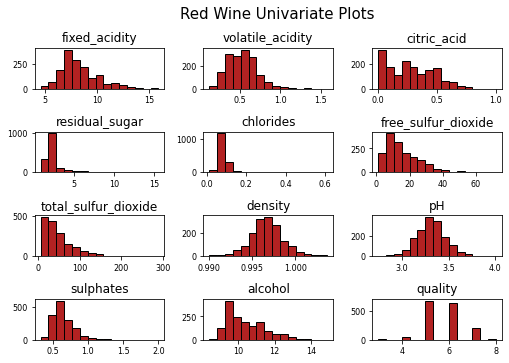

In [47]:
# Epic 2 Univariate Analysis

red_wine.hist(bins=15, color='FireBrick', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

rt = plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)


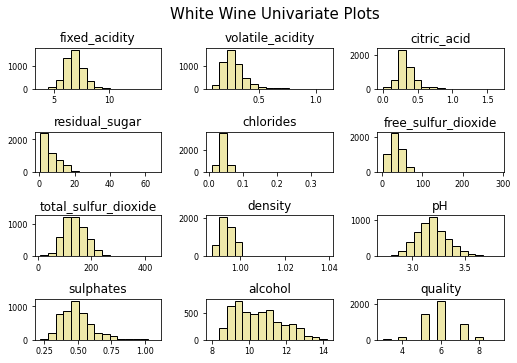

In [48]:
# Epic 2 Univariate Analysis

white_wine.hist(bins=15, color='PaleGoldenRod', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

rt = plt.suptitle('White Wine Univariate Plots ', x=0.65, y=1.25, fontsize=15)

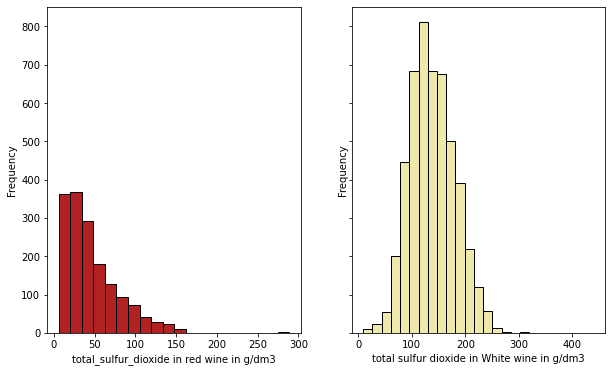

In [49]:
# Comparing singular red and white features with each other
fig, (ax1,ax2)  = plt.subplots(nrows=1, ncols=2, sharey = True,figsize= (10,6))

ax1.hist(red_wine["total_sulfur_dioxide"], bins=20, color='FireBrick', edgecolor='black', linewidth=1.0, )
ax1.set_ylabel("Frequency")
ax1.set_xlabel("total_sulfur_dioxide in red wine in g/dm3")

ax2.hist(white_wine["total_sulfur_dioxide"],bins=25, color='PaleGoldenRod', edgecolor='black', linewidth=1.0)
ax2.set_ylabel("Frequency")
ax2.set_xlabel("total sulfur dioxide in White wine in g/dm3")

plt.show()

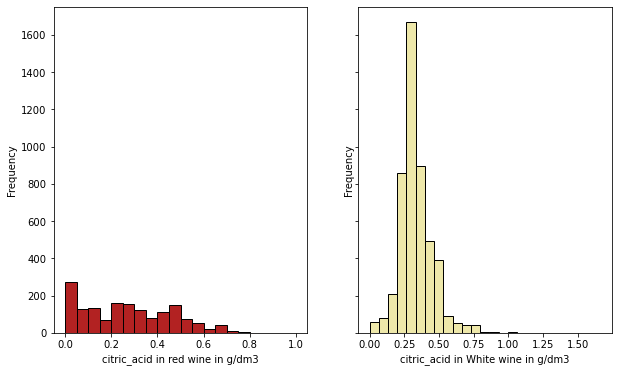

In [50]:
# Comparing singular red and white features with each other
fig, (ax1,ax2)  = plt.subplots(nrows=1, ncols=2, sharey = True,figsize= (10,6))

ax1.hist(red_wine["citric_acid"], bins=20, color='FireBrick', edgecolor='black', linewidth=1.0, )
ax1.set_ylabel("Frequency")
ax1.set_xlabel("citric_acid in red wine in g/dm3")

ax2.hist(white_wine["citric_acid"],bins=25, color='PaleGoldenRod', edgecolor='black', linewidth=1.0)
ax2.set_ylabel("Frequency")
ax2.set_xlabel("citric_acid in White wine in g/dm3")

plt.show()

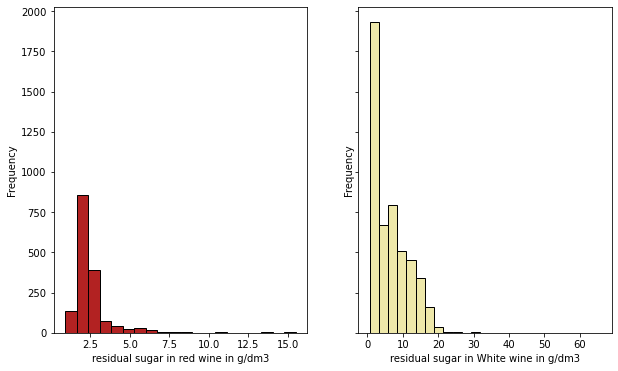

In [51]:
# Comparing singular red and white features with each other
fig, (ax1,ax2)  = plt.subplots(nrows=1, ncols=2, sharey = True,figsize= (10,6))

ax1.hist(red_wine["residual_sugar"], bins=20, color='FireBrick', edgecolor='black', linewidth=1.0, )
ax1.set_ylabel("Frequency")
ax1.set_xlabel("residual sugar in red wine in g/dm3")

ax2.hist(white_wine["residual_sugar"],bins=25, color='PaleGoldenRod', edgecolor='black', linewidth=1.0)
ax2.set_ylabel("Frequency")
ax2.set_xlabel("residual sugar in White wine in g/dm3")

plt.show()

In [52]:
wines.select_dtypes('number')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.17,0.74,12.80,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8
1,7.7,0.64,0.21,2.20,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5
2,6.8,0.39,0.34,7.40,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7
3,6.3,0.28,0.47,11.20,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6
4,7.4,0.35,0.20,13.90,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.6,0.32,0.58,16.75,0.050,43.0,163.0,0.99990,3.15,0.54,9.2,5
6493,5.6,0.28,0.27,3.90,0.043,52.0,158.0,0.99202,3.35,0.44,10.7,7
6494,6.4,0.37,0.20,5.60,0.117,61.0,183.0,0.99459,3.24,0.43,9.5,5
6495,6.5,0.26,0.50,8.00,0.051,46.0,197.0,0.99536,3.18,0.47,9.5,5


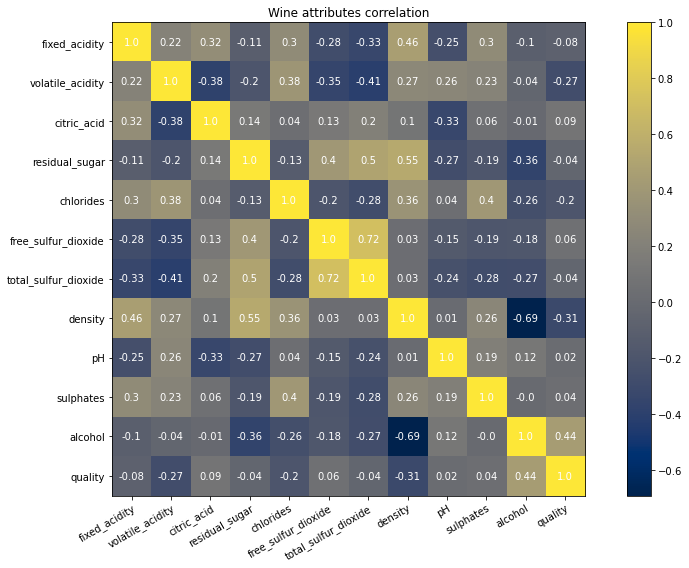

In [53]:
# Creating a heatmap

only_numeric = wines.select_dtypes('number')  #getting only the numeric columns

features_array = only_numeric.corr(method= "pearson").to_numpy().round(decimals= 2) #converting to array for plotting

fig, ax = plt.subplots(figsize= (12,8))
im = ax.imshow(features_array, cmap="cividis")

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(only_numeric.columns)),labels=only_numeric.columns)
ax.set_yticks(np.arange(len(only_numeric.columns)),labels=only_numeric.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=30, ha="right",
         rotation_mode="anchor")

# adding a color bar
ax.figure.colorbar(im, ax=ax)


# Loop over data dimensions and create text annotations.
for i in range(len(only_numeric.columns)):
    for j in range(len(only_numeric.columns)):
        text = ax.text(j, i, features_array[i, j],
                       ha="center", va="center", color="w")

#adding title and layout
ax.set_title("Wine attributes correlation")
fig.tight_layout()
plt.show()

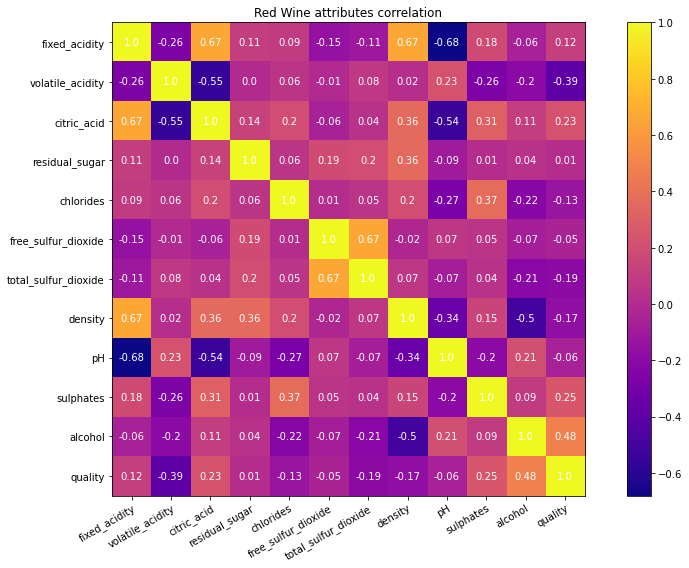

In [79]:
# Creating a heatmap for red wine attributes

only_numeric = red_wine.select_dtypes('number')  #getting only the numeric columns

features_array = only_numeric.corr(method= "pearson").to_numpy().round(decimals= 2) #converting to array for plotting

fig, ax = plt.subplots(figsize= (12,8))
im = ax.imshow(features_array, cmap="plasma")

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(only_numeric.columns)),labels=only_numeric.columns)
ax.set_yticks(np.arange(len(only_numeric.columns)),labels=only_numeric.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=30, ha="right",
         rotation_mode="anchor")

# adding a color bar
ax.figure.colorbar(im, ax=ax)


# Loop over data dimensions and create text annotations.
for i in range(len(only_numeric.columns)):
    for j in range(len(only_numeric.columns)):
        text = ax.text(j, i, features_array[i, j],
                       ha="center", va="center", color="w")

#adding title and layout
ax.set_title("Red Wine attributes correlation")
fig.tight_layout()
plt.show()

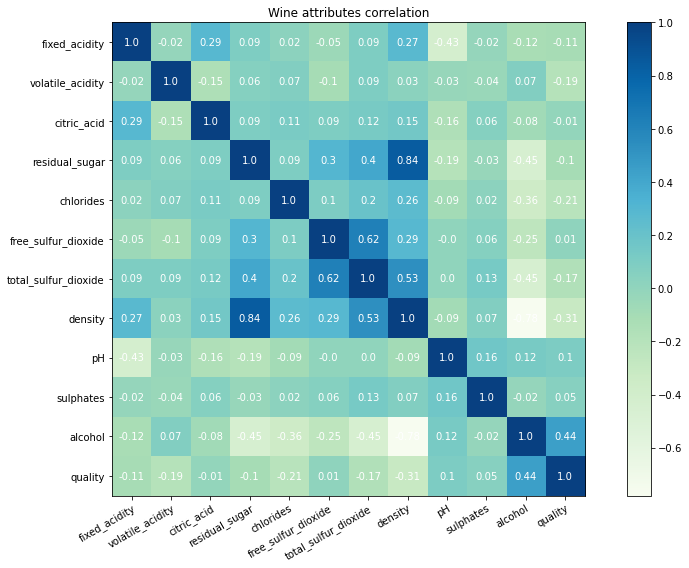

In [55]:
# Creating a heatmap for white wine attributes

only_numeric = white_wine.select_dtypes('number')  #getting only the numeric columns

features_array = only_numeric.corr(method= "pearson").to_numpy().round(decimals= 2) #converting to array for plotting

fig, ax = plt.subplots(figsize= (12,8))
im = ax.imshow(features_array, cmap="GnBu")

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(only_numeric.columns)),labels=only_numeric.columns)
ax.set_yticks(np.arange(len(only_numeric.columns)),labels=only_numeric.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=30, ha="right",
         rotation_mode="anchor")

# adding a color bar
ax.figure.colorbar(im, ax=ax)


# Loop over data dimensions and create text annotations.
for i in range(len(only_numeric.columns)):
    for j in range(len(only_numeric.columns)):
        text = ax.text(j, i, features_array[i, j],
                       ha="center", va="center", color="w")

#adding title and layout
ax.set_title("Wine attributes correlation")
fig.tight_layout()
plt.show()

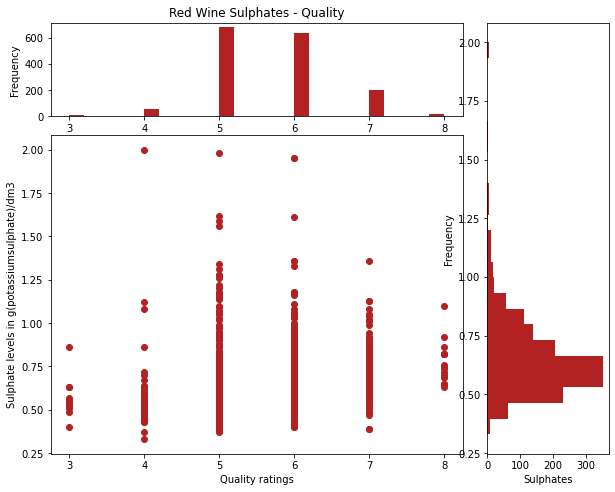

In [56]:
fig = plt.figure(figsize= (10,10))
gs = GridSpec(5,4)

ax_scatter = fig.add_subplot(gs[2:5, 0:3])
ax_hist_y = fig.add_subplot(gs[1,0:3])
ax_hist_x = fig.add_subplot(gs[1:5,3])

ax_scatter.scatter(red_wine["quality"], red_wine["sulphates"], color='FireBrick')
ax_scatter.set_xlabel("Quality ratings")
ax_scatter.set_ylabel("Sulphate levels in g(potassiumsulphate)/dm3")

ax_hist_y.hist(red_wine["quality"],bins=25, color='FireBrick')
ax_hist_y.set_ylabel("Frequency")
ax_hist_y.set_title("Red Wine Sulphates - Quality")


ax_hist_x.hist(red_wine["sulphates"],bins=25, color='FireBrick', orientation= "horizontal")
ax_hist_x.set_xlabel("Sulphates")
ax_hist_x.set_ylabel("Frequency")

plt.show()

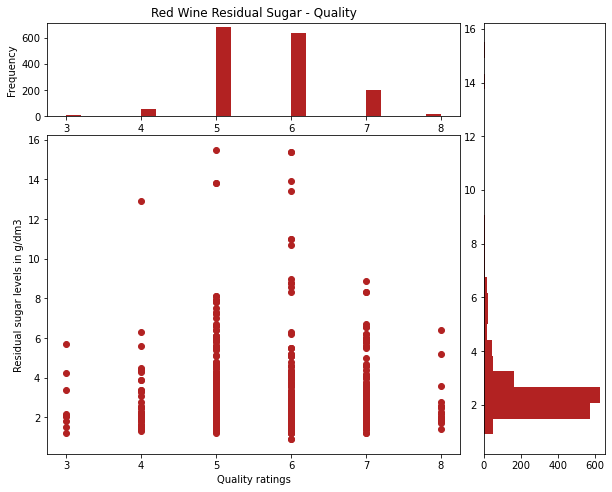

In [57]:
fig = plt.figure(figsize= (10,10))
gs = GridSpec(5,4)

ax_scatter = fig.add_subplot(gs[2:5, 0:3])
ax_hist_y = fig.add_subplot(gs[1,0:3])
ax_hist_x = fig.add_subplot(gs[1:5,3])

ax_scatter.scatter(red_wine["quality"], red_wine["residual_sugar"], color='FireBrick')
ax_scatter.set_xlabel("Quality ratings")
ax_scatter.set_ylabel("Residual sugar levels in g/dm3")

ax_hist_y.hist(red_wine["quality"],bins=25, color='FireBrick')
ax_hist_y.set_ylabel("Frequency")
ax_hist_y.set_title("Red Wine Residual Sugar - Quality")

ax_hist_x.hist(red_wine["residual_sugar"],bins=25, color='FireBrick', orientation= "horizontal")

plt.show()

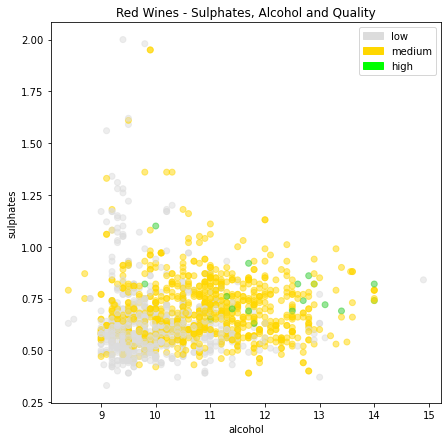

In [58]:
# checking out three variables with scatterplots

colors = {"low": "Gainsboro", "medium": "Gold", "high": "LimeGreen"} 

fig, ax = plt.subplots(figsize = (7,7))
scatter = ax.scatter(red_wine["alcohol"], red_wine["sulphates"],
           c=red_wine['quality_label'].map(colors), alpha=0.5)
ax.set_xlabel("alcohol", fontsize=10)
ax.set_ylabel("sulphates", fontsize=10)
ax.set_title('Red Wines - Sulphates, Alcohol and Quality')

low_quality = mpatches.Patch(color='Gainsboro', label='low')
medium_quality = mpatches.Patch(color='Gold', label='medium')
high_quality = mpatches.Patch(color='Lime', label='high')

ax.legend(handles=[low_quality, medium_quality, high_quality])

plt.show()

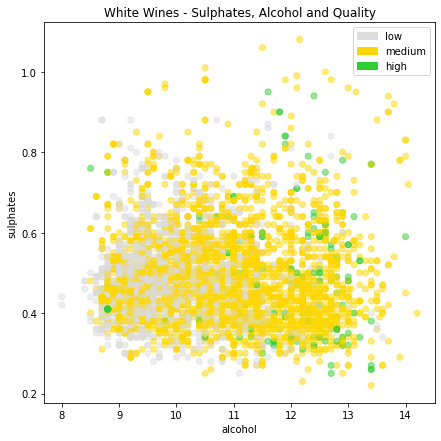

In [59]:

colors = {"low": "Gainsboro", "medium": "Gold", "high": "LimeGreen"} 

fig, ax = plt.subplots(figsize = (7,7))
scatter = ax.scatter(white_wine["alcohol"], white_wine["sulphates"],
           c=white_wine['quality_label'].map(colors), alpha=0.5)
ax.set_xlabel("alcohol", fontsize=10)
ax.set_ylabel("sulphates", fontsize=10)
ax.set_title('White Wines - Sulphates, Alcohol and Quality')

low_quality = mpatches.Patch(color='Gainsboro', label='low')
medium_quality = mpatches.Patch(color='Gold', label='medium')
high_quality = mpatches.Patch(color='LimeGreen', label='high')

ax.legend(handles=[low_quality, medium_quality, high_quality])

plt.show()

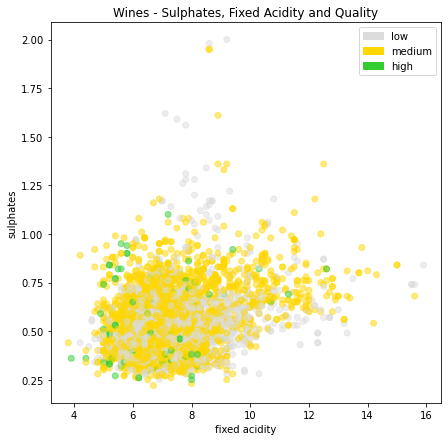

In [68]:
colors = {"low": "Gainsboro", "medium": "Gold", "high": "LimeGreen"} 

fig, ax = plt.subplots(figsize = (7,7))
scatter = ax.scatter(wines["fixed_acidity"], wines["sulphates"],
           c=wines['quality_label'].map(colors), alpha=0.5)
ax.set_xlabel("fixed acidity", fontsize=10)
ax.set_ylabel("sulphates", fontsize=10)
ax.set_title('Wines - Sulphates, Fixed Acidity and Quality')

low_quality = mpatches.Patch(color='Gainsboro', label='low')
medium_quality = mpatches.Patch(color='Gold', label='medium')
high_quality = mpatches.Patch(color='LimeGreen', label='high')

ax.legend(handles=[low_quality, medium_quality, high_quality])

plt.show()

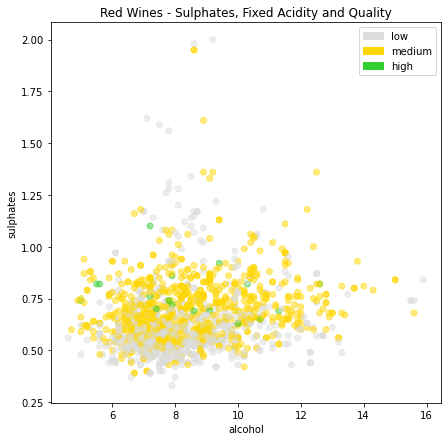

In [63]:
colors = {"low": "Gainsboro", "medium": "Gold", "high": "LimeGreen"} 

fig, ax = plt.subplots(figsize = (7,7))
scatter = ax.scatter(red_wine["fixed_acidity"], red_wine["sulphates"],
           c=red_wine['quality_label'].map(colors), alpha=0.5)
ax.set_xlabel("alcohol", fontsize=10)
ax.set_ylabel("sulphates", fontsize=10)
ax.set_title('Red Wines - Sulphates, Fixed Acidity and Quality')

low_quality = mpatches.Patch(color='Gainsboro', label='low')
medium_quality = mpatches.Patch(color='Gold', label='medium')
high_quality = mpatches.Patch(color='LimeGreen', label='high')

ax.legend(handles=[low_quality, medium_quality, high_quality])

plt.show()

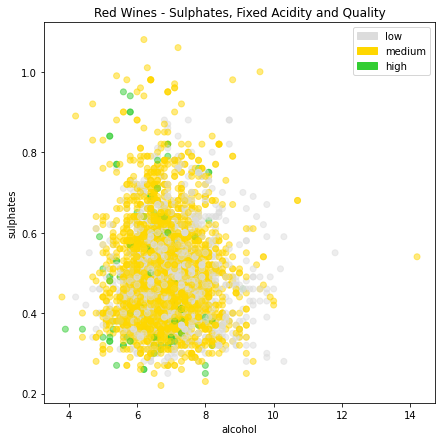

In [65]:
colors = {"low": "Gainsboro", "medium": "Gold", "high": "LimeGreen"} 

fig, ax = plt.subplots(figsize = (7,7))
scatter = ax.scatter(white_wine["fixed_acidity"], white_wine["sulphates"],
           c=white_wine['quality_label'].map(colors), alpha=0.5)
ax.set_xlabel("alcohol", fontsize=10)
ax.set_ylabel("sulphates", fontsize=10)
ax.set_title('Red Wines - Sulphates, Fixed Acidity and Quality')

low_quality = mpatches.Patch(color='Gainsboro', label='low')
medium_quality = mpatches.Patch(color='Gold', label='medium')
high_quality = mpatches.Patch(color='LimeGreen', label='high')

ax.legend(handles=[low_quality, medium_quality, high_quality])

plt.show()